In [2]:
!pip uninstall tensorflow

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0


In [3]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 116kB/s 
     |████████████████████████████████| 450kB 42.2MB/s 
     |████████████████████████████████| 3.8MB 43.7MB/s 
     |████████████████████████████████| 81kB 11.4MB/s 
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [0]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.0.0'

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [0]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [0]:
train_images_flat = train_images.reshape([60000,784,-1])

In [6]:
train_images_flat.shape

(60000, 784, 1)

In [0]:
import matplotlib.pyplot as plt

In [0]:
def draw_sample(img):
  plt.imshow(img,cmap='gray',vmin=0, vmax=255)
  plt.show()

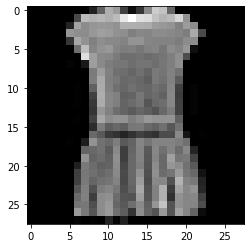

In [9]:
draw_sample(train_images[3])

Numeric labels also have the benefit of reducing bias of origin language. Numeric labels are language independent. Using a number is a first step in avoiding bias -- instead of labelling it with words in a specific language and excluding people who don’t speak that language

In [10]:
train_labels[3]

3

Normalization of data improved peformance by manifolds.

In [0]:
# Normalise image data

train_images = train_images/255
test_images = test_images/255

In [0]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(256,activation=tf.nn.relu),
                          keras.layers.Dense(128,activation=tf.nn.relu),
                          keras.layers.Dense(64,activation=tf.nn.relu),
                          keras.layers.Dense(10,activation=tf.nn.softmax)])

In [0]:
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy')

In [36]:
model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.4848
Epoch 2/10
60000/60000 [==============================] - 8s 125us/sample - loss: 0.3634
Epoch 3/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.3285
Epoch 4/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.3042
Epoch 5/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2852
Epoch 6/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2744
Epoch 7/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.2601
Epoch 8/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.2510
Epoch 9/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.2404
Epoch 10/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.2317


In [37]:
model.evaluate(train_images,train_labels)

60000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.2111094777782758

In [38]:
model.evaluate(test_images,test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.33114521913528444